# Example 1

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("salary.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michel,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


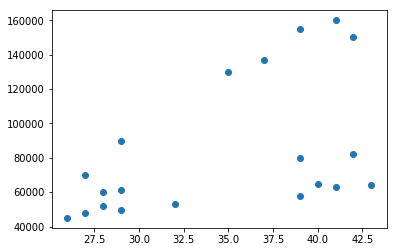

In [3]:
plt.scatter(df.Age,df["Income($)"])

In [4]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
df["cluster"]=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michel,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,Devid,41,160000,1
7,Andre,35,130000,1
8,Donald,37,137000,1
9,Tom,26,45000,0


In [8]:
km.cluster_centers_

array([[  3.29090909e+01,   5.62272727e+04],
       [  3.88000000e+01,   1.46400000e+05],
       [  3.42500000e+01,   8.05000000e+04]])

In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

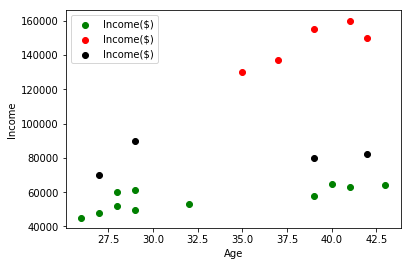

In [10]:
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [11]:
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.217391,2
1,Michel,29,0.391304,2
2,Mohan,29,0.139130,0
3,Ismail,28,0.130435,0
4,Kory,42,0.913043,1


In [12]:
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.217391,2
1,Michel,0.176471,0.391304,2
2,Mohan,0.176471,0.139130,0
3,Ismail,0.117647,0.130435,0
4,Kory,0.941176,0.913043,1


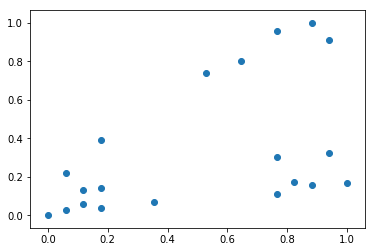

In [13]:
plt.scatter(df.Age,df["Income($)"])

In [14]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
df["cluster"]=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.217391,0
1,Michel,0.176471,0.391304,0
2,Mohan,0.176471,0.139130,0
3,Ismail,0.117647,0.130435,0
4,Kory,0.941176,0.913043,1
5,Gautam,0.764706,0.956522,1
6,Devid,0.882353,1.000000,1
7,Andre,0.529412,0.739130,1
8,Donald,0.647059,0.800000,1
9,Tom,0.000000,0.000000,0


In [16]:
km.cluster_centers_

array([[ 0.1372549 ,  0.11932367],
       [ 0.75294118,  0.88173913],
       [ 0.8627451 ,  0.2057971 ]])

In [17]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

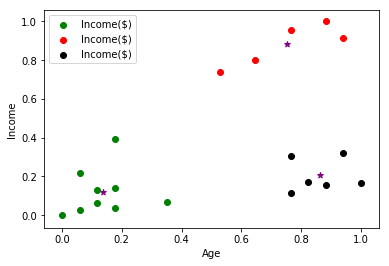

In [19]:
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label="centroid")

In [22]:
sse=[]
k_rng=range(1,10)

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [23]:
sse

[4.7519726290382716,
 1.7254302273392939,
 0.44646333350049333,
 0.3140932853366708,
 0.22507452886636711,
 0.17324863627203368,
 0.14243789287092587,
 0.1165948024934427,
 0.087957234711965593]

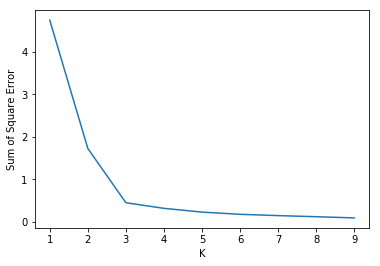

In [24]:
plt.xlabel("K")
plt.ylabel("Sum of Square Error")
plt.plot(k_rng,sse)